This code creates a plot for averaged (the last 6/10) end-to-end-distance for a certain N in dependence of N (=Number of Monomers).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import curve_fit
import csv

#load parameters from subfolder (each has the same content as others; exception: Number of Monomers)
import os
os.chdir('10')
import initial_parameters
os.chdir('..')

Kuhn_length_b = initial_parameters.Kuhn_length_b
tau_rouse_theory = initial_parameters.tau_rouse_theory

In [2]:
#create lists for quantities for graphical representation (plots)
list_of_Monomers = []
list_of_Bonds = []
list_of_sq_end_to_end_distances = []


averaged_quantities = open('averages_for_plot','r')
lines = csv.reader(averaged_quantities, delimiter='	')

for line in lines:

        #time has to be multiplied by dt, otherwise it is number of timesteps
        list_of_Monomers.append(float(line[0]))
        list_of_Bonds.append(float(line[0]) - 1)
        list_of_sq_end_to_end_distances.append(float(line[1]))

#close the file
averaged_quantities.close()

# Create the plot

b^2 = [2.97253237] +/- [0.02715532]


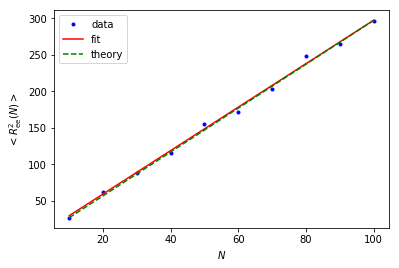

In [3]:
#covert arrays into numpy arrays and use short names (use N and y)
N = np.array(list_of_Monomers)
list_of_Bonds = np.array(list_of_Bonds)
y = np.array(list_of_sq_end_to_end_distances)

#define fit function; take independent variable as first argument
def func_sq_ee_dinstance_in_dependence_of_N(N, b_squared):
    
    #Attention: <R_ee^2> depends on BONDS!
    return N*b_squared

#fit the curve using function
popt, pcov = curve_fit(func_sq_ee_dinstance_in_dependence_of_N, N, y)

#calculate standard deviation from estimated covariance
perr = np.sqrt(np.diag(pcov))

print ("b^2 = "+str(popt)+" +/- "+str(perr))

#plot the results, #Attention: <R_ee^2> depends on BONDS!
plt.plot(N, y, 'b.', label='data')
plt.plot(N, func_sq_ee_dinstance_in_dependence_of_N(N, *popt), 'r-', label=('fit'))

#list_of_Bonds = N-1 (list of Monomers, but every element is decreased by 1)
plt.plot(N, (list_of_Bonds)*Kuhn_length_b**2, 'g--', label=('theory'))

#save the plot
plt.legend(loc='best')

plt.xlabel(r'$N$')
plt.ylabel(r'$<R_{\mathrm{ee}}^2(N)>$')
plt.draw()
plt.savefig('sq_distance_in_dependence_of_N.png')
plt.show()
plt.close()